In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-dataset/Housing.csv


# Predicting House Prices
This is a simple analysis and prediction of house prices. We will find out which particular factor affects the price of house.
We will check by:
- Location
- Size (area of space occupied)
- Year built
- All the parameters

# **Imports**

In [2]:
# getting the necessary imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# transformers and predictor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
# performance metrics
from sklearn.metrics import mean_absolute_error
# model selection for train and test data
from sklearn.model_selection import train_test_split


# Reading and Exploring the Data
I am still working on my story telling.

In [3]:
# read the csv file and see the information for each columns
data = pd.read_csv('/kaggle/input/housing-price-dataset/Housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# let's check if there's any with nan values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So we have a clean dataset with no nan value. 
Let's check the shape. i.e No. of columns and rows

In [6]:
data.shape

(21613, 21)

We have 21,613 rows and 21 columns

**Let's view:**
- Price relative to the number of rooms
- Price relative to size
- Prices of houses based on year
- cluster of the houses and their price

In [7]:
# no of unique values of bedrooms
data['bedrooms'].unique()

array([ 2,  3,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

Text(0, 0.5, 'Price in Millions')

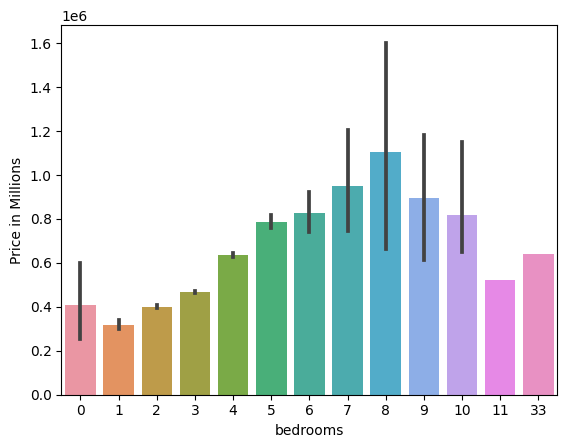

In [8]:
# price relative to the number of rooms
sns.barplot(x = data.bedrooms, y = data.price)
plt.ylabel('Price in Millions')

<Axes: xlabel='sqft_living', ylabel='price'>

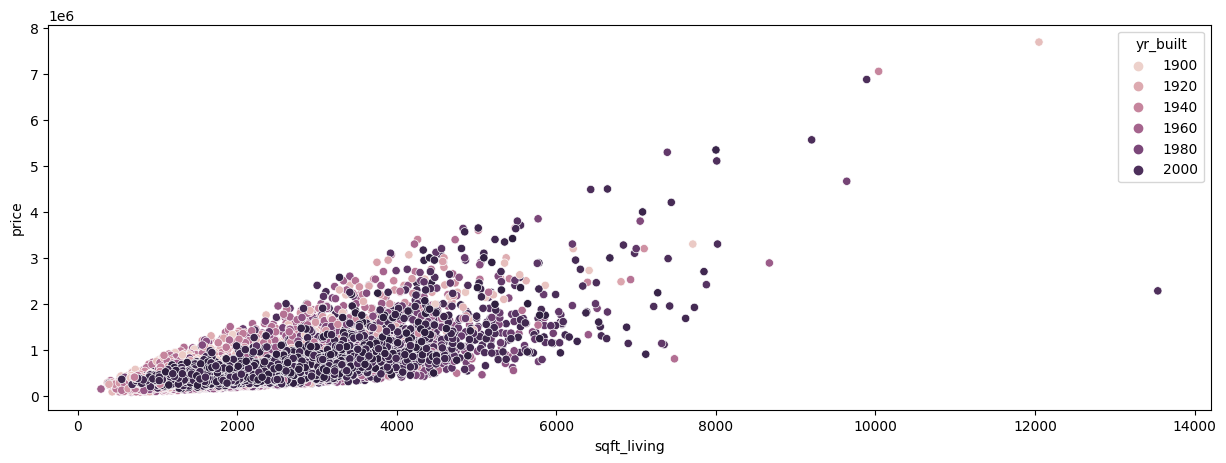

In [9]:
plt.figure(figsize=[15,5])
sns.scatterplot(data, x = 'sqft_living', y = 'price', hue = 'yr_built')


/tmp/ipykernel_18/2982715102.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = data.resample("M", on="date").mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Price Per Mounth')

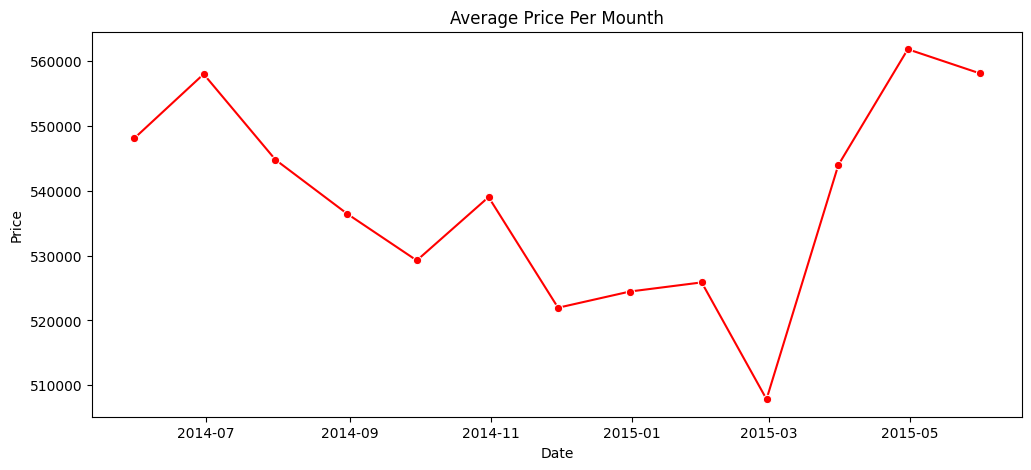

In [10]:
# Prices of houses based on year
# convert the date to pandas date
data['date'] = pd.to_datetime(data['date'])
# to make it show the date with only month
resampled_df = data.resample("M", on="date").mean().reset_index()

# i only want to visulaize data based on month data
plt.figure(figsize=[12,5])
sns.lineplot(data = resampled_df, x = 'date', y = 'price', c= 'red', marker = 'o')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Average Price Per Mounth")

**Analysis and question answering**
- 

In [11]:
# knowing the average price for each no. of house bedroom
data.groupby('bedrooms')['price'].mean()

bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.013111e+05
3     4.662570e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

# Data Processing
This will involve
- data cleaning/wrangling
- Checking and removing
    - Outliers
    - Correlations/ removing unncessary features
    - columns with low and high cardinality
- Separate the train from test data, and the feature and target data

In [12]:
# I will like to subset my data to just house lesser than 1.5million
mask_price = data['price'] < 1500000
# removing outliers by only taking data between the 0.1 and0.9 quartile
low, high= data['price'].quantile([0.1,0.9])
mask_card = data['price'].between(low, high)
data = data[mask_price & mask_card]
data.shape

(17371, 21)

<Axes: >

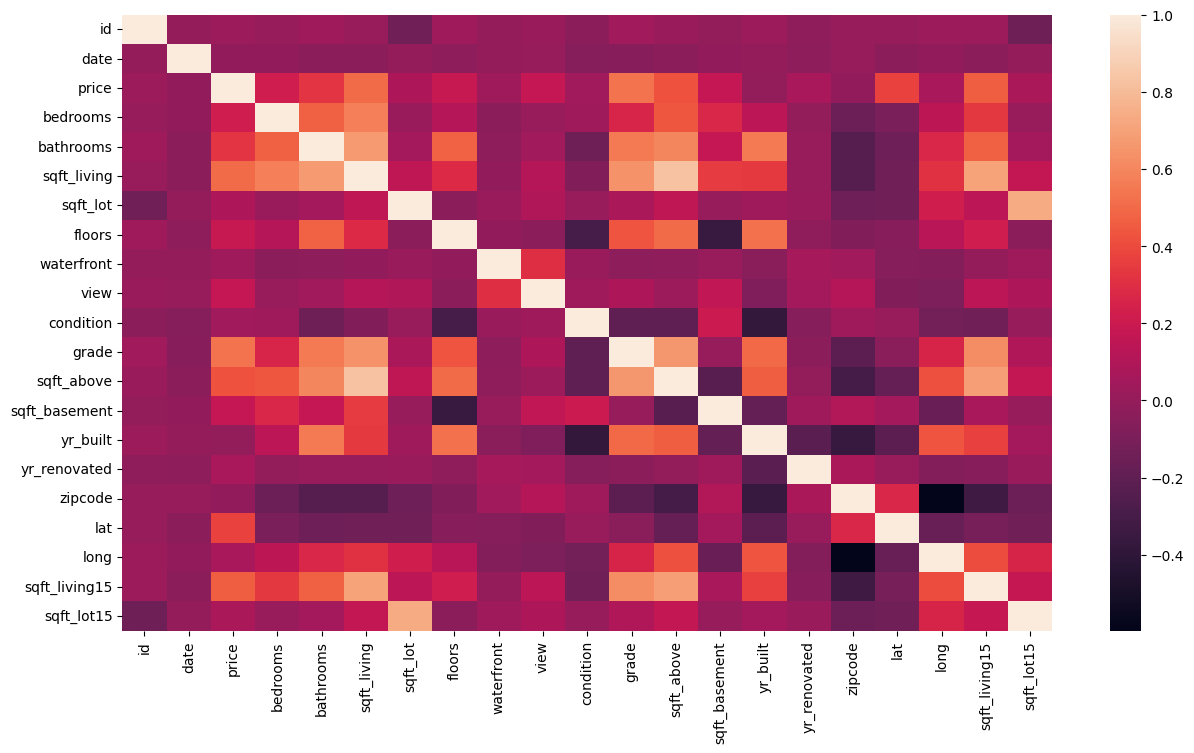

In [13]:
# drop correlating columns
plt.figure(figsize = (15,8))
sns.heatmap(data.corr())

It can be seen that sqft_lot, sqft_lot15, sqft_living15, sqft_living and sqft_above, all have correlation. But for this analysis, i am only going to keep sqft_living.

In [14]:
# before dropping unneccesary colunmns. Let's checking for columns with low and high cardinality
data.nunique()

id               17281
date               368
price             2756
bedrooms            13
bathrooms           24
sqft_living        830
sqft_lot          8376
floors               6
waterfront           2
view                 5
condition            5
grade               10
sqft_above         781
sqft_basement      257
yr_built           116
yr_renovated        69
zipcode             70
lat               4762
long               738
sqft_living15      663
sqft_lot15        7431
dtype: int64

It can be seen that columns like id (all items are very unique, thus high cardinality), sqft_lot, sqft_lot15
then, floors, waterfrint, view, condition, grade.
We have to drop those columns

In [15]:
data.drop(columns = ['id', 'waterfront', 'view', 'condition', 'grade', 'sqft_lot', 'sqft_lot15', 'floors'], inplace = True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17371 entries, 1 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17371 non-null  datetime64[ns]
 1   price          17371 non-null  float64       
 2   bedrooms       17371 non-null  int64         
 3   bathrooms      17371 non-null  float64       
 4   sqft_living    17371 non-null  int64         
 5   sqft_above     17371 non-null  int64         
 6   sqft_basement  17371 non-null  int64         
 7   yr_built       17371 non-null  int64         
 8   yr_renovated   17371 non-null  int64         
 9   zipcode        17371 non-null  int64         
 10  lat            17371 non-null  float64       
 11  long           17371 non-null  float64       
 12  sqft_living15  17371 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 1.9 MB


In [16]:
# drop the correlators  and other unnecessary columns
data.drop(columns = ['sqft_above', 'sqft_basement', 'sqft_living15', 'zipcode', 'yr_renovated', 'bathrooms', 'date'],inplace = True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17371 entries, 1 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17371 non-null  float64
 1   bedrooms     17371 non-null  int64  
 2   sqft_living  17371 non-null  int64  
 3   yr_built     17371 non-null  int64  
 4   lat          17371 non-null  float64
 5   long         17371 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 950.0 KB


**Train and Test, Feature and Target Data**
-

In [18]:
# I will first get the feature and target data out
# Since i will be predicting for different scenrios, the feature variables will be specific to its role but the target woun't

target = 'price'
y_train = data[target]

year = ['yr_built']
yearFeature = data[year]

sqft = ['sqft_living']
sqftFeature = data[sqft]

bedroom = ['bedrooms']
bedroomFeature = data[bedroom]

location = ['lat', 'long']
locationFeature = data[location]

all = ['bedrooms', 'sqft_living', 'yr_built', 'lat', 'long']
allFeature = data[all]
sqftFeature.shape

(17371, 1)

In [19]:
# then its time to shuffle and split
allFeatTrain, allFeatTest, allTargetTrain, allTargetTest = train_test_split(allFeature, y_train, test_size = 0.3, random_state  = 42,shuffle = True)
yearFeatTrain, yearFeatTest, yearTargetTrain, yearTargetTest = train_test_split(yearFeature, y_train, test_size = 0.3, random_state  = 42,shuffle = True)
sqftFeatTrain, sqftFeatTest, sqftTargetTrain, sqftTargetTest = train_test_split(sqftFeature, y_train, test_size = 0.3, random_state  = 42,shuffle = True)
bedroomFeatTrain, bedroomFeatTest, bedroomTargetTrain, bedroomTargetTest = train_test_split(bedroomFeature, y_train, test_size = 0.3, random_state  = 42,shuffle = True)
locationFeatTrain, locationFeatTest, locationTargetTrain, locationTargetTest = train_test_split(locationFeature, y_train, test_size = 0.3, random_state  = 42,shuffle = True)

yearTargetTest.shape

(5212,)

# Build Model

**The Baseline model**
-

In [20]:
# get the mean of the target data
y_mean = y_train.mean()
# let the mean be a list with the length of the target data
y_base = [y_mean] * len(y_train)
# as a metric measurement, i will use MAE
y_baseline_metric = mean_absolute_error(y_train, y_base).round(2)
print(f'The mean absolute error is {y_baseline_metric}')

The mean absolute error is 136955.17


**Define Model, Fit and Predict**
-

In [21]:
modelPipeline = make_pipeline(
    # i will use these transformers just in case of an oversight
    #OneHotEncoder(use_cat_names=True),
    SimpleImputer(), 
    # predictor
    Ridge()
)

In [22]:
print(f'{allFeatTrain.shape}, {yearTargetTrain.shape}')

(12159, 5), (12159,)


In [23]:
# This is not a recommended approach when dealing multiple factors than this. A for loop is better to split train and test data
features = [yearFeatTrain, sqftFeatTrain, bedroomFeatTrain, locationFeatTrain, allFeatTrain]
theTargets = [yearTargetTrain, sqftTargetTrain, bedroomTargetTrain, locationTargetTrain, allTargetTrain]
testfeatures = [yearFeatTest, sqftFeatTest, bedroomFeatTest, locationFeatTest, allFeatTest] 
testTarget = [yearTargetTest, sqftTargetTest, bedroomTargetTest, locationTargetTest, allTargetTest] 
result = {}

#loop through the feature to fit the model and predict 
for feature, featureTest, price, targetTest  in zip(features, testfeatures, theTargets, testTarget):
    # fit the model
    modelPipeline.fit(feature, price)
    
    #Store the fitted model into a list
    #modelPipeline[feature] = modelPipeline
    
    #predict using the test data
    price_pred = modelPipeline.predict(featureTest)
    
    #get the MAE
    modelMAE = mean_absolute_error(targetTest, price_pred)
    
    # store the result
    result = {'MAE' : modelMAE}

# lets print the result
for feature in features:
    print(f'MAE: {result["MAE"]}')
    

MAE: 92021.40640779778
MAE: 92021.40640779778
MAE: 92021.40640779778
MAE: 92021.40640779778
MAE: 92021.40640779778


In [24]:
# let me try this
modelPipeline.fit(allFeatTrain, allTargetTrain)
all_pred = modelPipeline.predict(allFeatTest)

In [25]:
MAE = mean_absolute_error(allTargetTest, all_pred).round(2)

In [26]:
MAE

92021.41

In [27]:
modelPipeline.fit(yearFeatTrain, yearTargetTrain)
year_pred = modelPipeline.predict(yearFeatTest)
yearMAE = mean_absolute_error(yearTargetTest, year_pred).round(2)
yearMAE

135550.46

In [28]:
modelPipeline.fit(sqftFeatTrain, sqftTargetTrain)
sqft_pred = modelPipeline.predict(sqftFeatTest)
sqftMAE = mean_absolute_error(sqftTargetTest, sqft_pred).round(2)
sqftMAE

114842.43

In [29]:
modelPipeline.fit(bedroomFeatTrain, bedroomTargetTrain)
bed_pred = modelPipeline.predict(bedroomFeatTest)
bedMAE = mean_absolute_error(bedroomTargetTest, bed_pred).round(2)
bedMAE

131813.79

In [30]:
modelPipeline.fit(locationFeatTrain, locationTargetTrain)
location_pred = modelPipeline.predict(locationFeatTest)
locationMAE = mean_absolute_error(locationTargetTest, location_pred).round(2)
locationMAE

121857.83